# Recommendation System with Graphs

Based on https://arxiv.org/pdf/1004.1001.pdf

In [2]:
from GraphDB.GraphDB import GraphDB
import os
if os.path.exists("traversal.sqlite"):
    os.remove("traversal.sqlite")

In [3]:
db = GraphDB("traversal.sqlite")
db.add_node({'name': 'p1', 'type': 'person', "id": 1})
db.add_node({'name': 'p6', 'type': 'person', "id": 2})
db.add_node({'name': 'p7', 'type': 'person', "id": 3})

db.add_node({'name': 'r2', 'type': 'ressource', "id": 4})
db.add_node({'name': 'r3', 'type': 'ressource', "id": 5})
db.add_node({'name': 'r4', 'type': 'ressource', "id": 6})

db.add_node({'name': 'f5', 'type': 'feature', "id": 7})
db.add_node({'name': 'f8', 'type': 'feature', "id": 8})


db.add_ege(1, 4, {'action': 'likes'})
db.add_ege(2, 4, {'action': 'likes'})
db.add_ege(2, 5, {'action': 'likes'})

db.add_ege(3, 5, {'action': 'likes'})

db.add_ege(1, 5, {'action': 'likes'})
db.add_ege(1, 6, {'action': 'likes'})

db.add_ege(4, 8, {'action': 'features'})
db.add_ege(5, 8, {'action': 'features'})
db.add_ege(6, 7, {'action': 'features'})


# Draw Graph

{'name': 'p1', 'type': 'person', 'id': 1}
{'name': 'p6', 'type': 'person', 'id': 2}
{'name': 'p7', 'type': 'person', 'id': 3}
{'name': 'r2', 'type': 'ressource', 'id': 4}
{'name': 'r3', 'type': 'ressource', 'id': 5}
{'name': 'r4', 'type': 'ressource', 'id': 6}
{'name': 'f5', 'type': 'feature', 'id': 7}
{'name': 'f8', 'type': 'feature', 'id': 8}


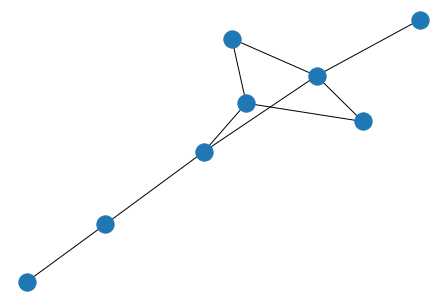

In [4]:
import networkx as nx
G = db.to_networkx()
nx.draw(G)

# Content-Based Recommendation

$f(i) = (\epsilon^i_{\epsilon-} \circ v_{out} \circ e^{feature}_{lab+} \circ v_{in} e^{feature}_{lab+} \circ e_{out})(i)$

With $i=5$ (ressource 3)

In [5]:
eout = db.get_edges(source=5, predicate={'action': 'features'})
vin = db.get_target_nodes(eout)
ein = db.get_edges(target=vin, predicate={'action': 'features'})
vout = db.get_source_nodes(ein)
vout = list(filter(lambda node: node["id"] != 5, vout))
vout

[{'name': 'r2', 'type': 'ressource', 'id': 4}]

# Collaborative Filtering

$f(i)=\left(\epsilon_{\epsilon-}^{i} \circ v_{\mathrm{out}} \circ e_{\mathrm{lab}+}^{\mathrm{like}} \circ e_{\mathrm{in}} \circ v_{\mathrm{in}} \circ e_{\mathrm{lab}+}^{\mathrm{like}} \circ e_{\mathrm{out}}\right)(i)$

$g(j)=\left(v_{\text {in }} \circ e_{\mathrm{lab}+}^{\text {like }} \circ e_{\text {out }}\right)(j)$

and 

$(g \circ f)(i)$

with $i=1$ (person 1)

In [6]:
eout = db.get_edges(source=1, predicate={'action': 'likes'})
vin = db.get_target_nodes(eout)
ein = db.get_edges(target=vin, predicate={'action': 'likes'})
vout = db.get_source_nodes(ein)
vout = list(filter(lambda node: node["id"] != 1, vout))
f = vout
eout = db.get_edges(source=f, predicate={'action': 'likes'})
vin = db.get_target_nodes(eout)
vin

[{'name': 'r2', 'type': 'ressource', 'id': 4},
 {'name': 'r3', 'type': 'ressource', 'id': 5}]